In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.linear_model import Lasso, LinearRegression, LogisticRegression, ElasticNet
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score, GridSearchCV, train_test_split
from sklearn.feature_selection import RFE, SelectKBest, f_classif, f_regression

In [2]:
df = pd.read_csv('datasets/boston.csv')

In [4]:
corr = df.corr()

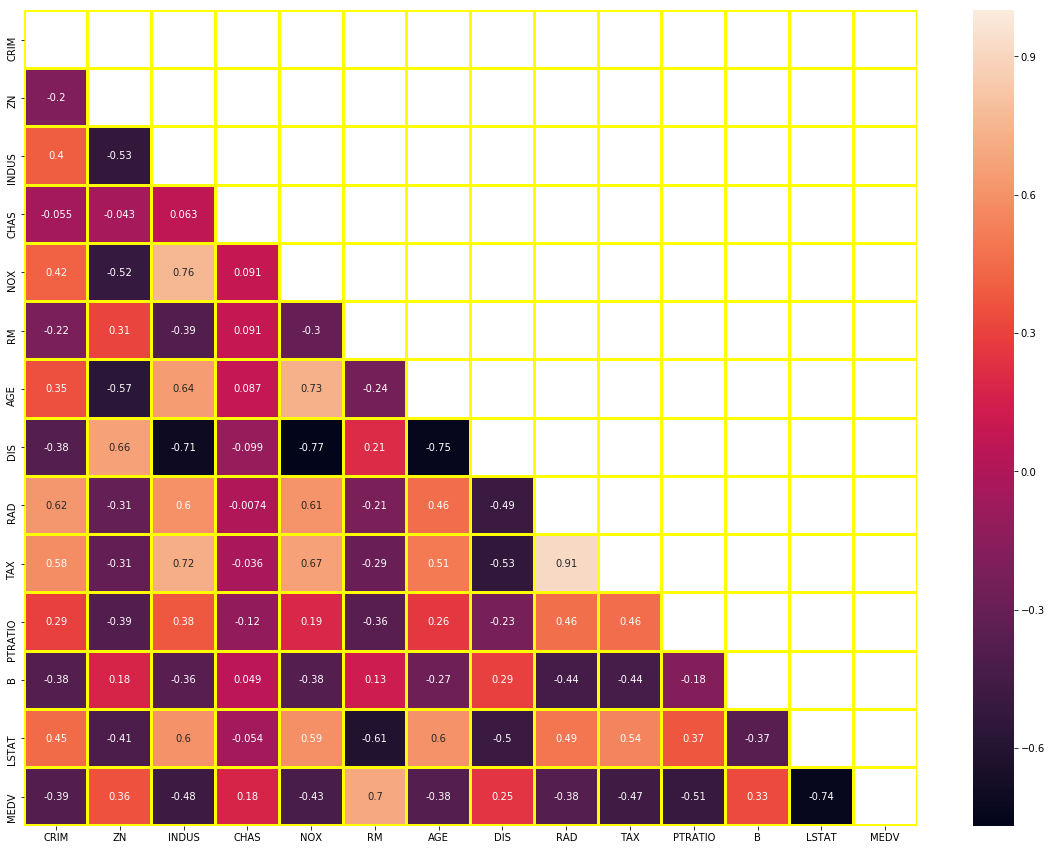

In [9]:
fig, ax = plt.subplots(figsize=(20,15))

mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

sns.heatmap(corr, mask=mask, ax=ax, annot=True, linewidth=2, linecolor='yellow')

In [15]:
df.corr()['MEDV'].apply(lambda x: abs(x)).sort_values(ascending=False)

MEDV       1.000000
LSTAT      0.737663
RM         0.695360
PTRATIO    0.507787
INDUS      0.483725
TAX        0.468536
NOX        0.427321
CRIM       0.385832
RAD        0.381626
AGE        0.376955
ZN         0.360445
B          0.333461
DIS        0.249929
CHAS       0.175260
Name: MEDV, dtype: float64

In [64]:
x = df.loc[:, df.columns != 'MEDV']
print(df.shape)
print(df.columns)

(506, 14)
Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT', 'MEDV'],
      dtype='object')


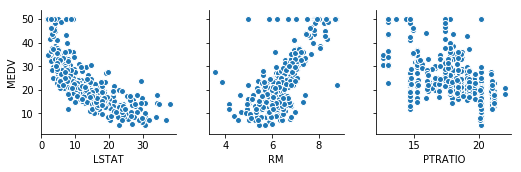

In [67]:
sns.pairplot(df, x_vars=['LSTAT', 'RM', 'PTRATIO'], y_vars=['MEDV'])

In [18]:
wine = pd.read_csv('datasets/wine.csv')

In [19]:
wine.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,quality
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0


In [21]:
wine_quality = pd.get_dummies(wine['quality'], prefix='quality')

In [27]:
wine_quality.columns.values

array(['quality_0', 'quality_1', 'quality_2'], dtype=object)

In [28]:
wine_quality.shape

(178, 3)

In [29]:
wine.shape

(178, 14)

In [76]:
wine_new = wine.join(wine_quality)

In [80]:
wine_new = pd.concat([wine, wine_quality], axis=1)

In [81]:
wine_new.head()
print(wine_new.shape)

(178, 17)


In [82]:
wine_corr = wine_new.corr()

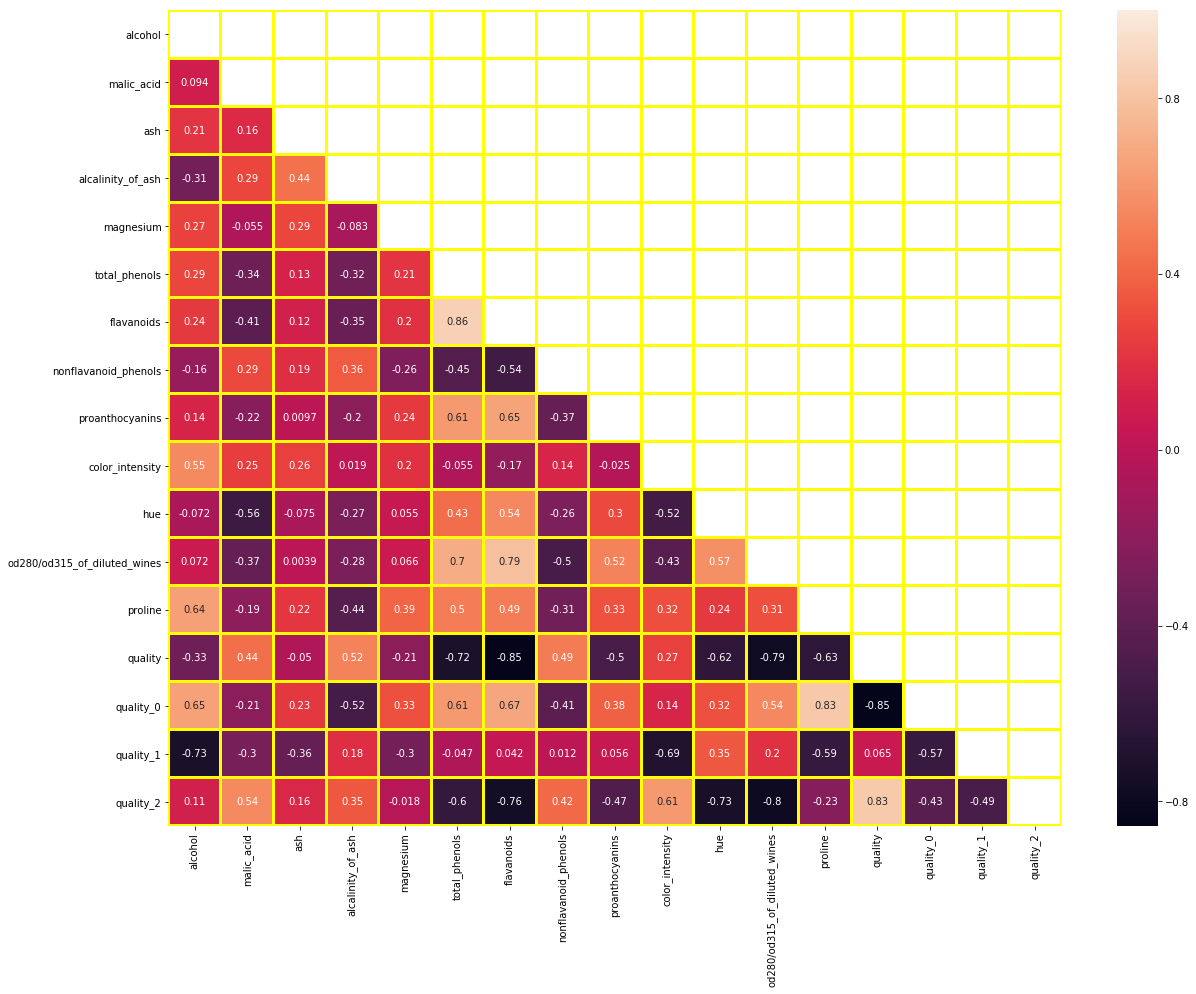

In [83]:
fig, ax = plt.subplots(figsize=(20,15))
mask = np.zeros_like(wine_corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
sns.heatmap(wine_corr, mask=mask, ax=ax, annot=True, linecolor='yellow', linewidth=2)

In [94]:
fav_wine = wine_new[['proline', 'flavanoids', 'total_phenols', 'alcohol', 'quality']].copy()

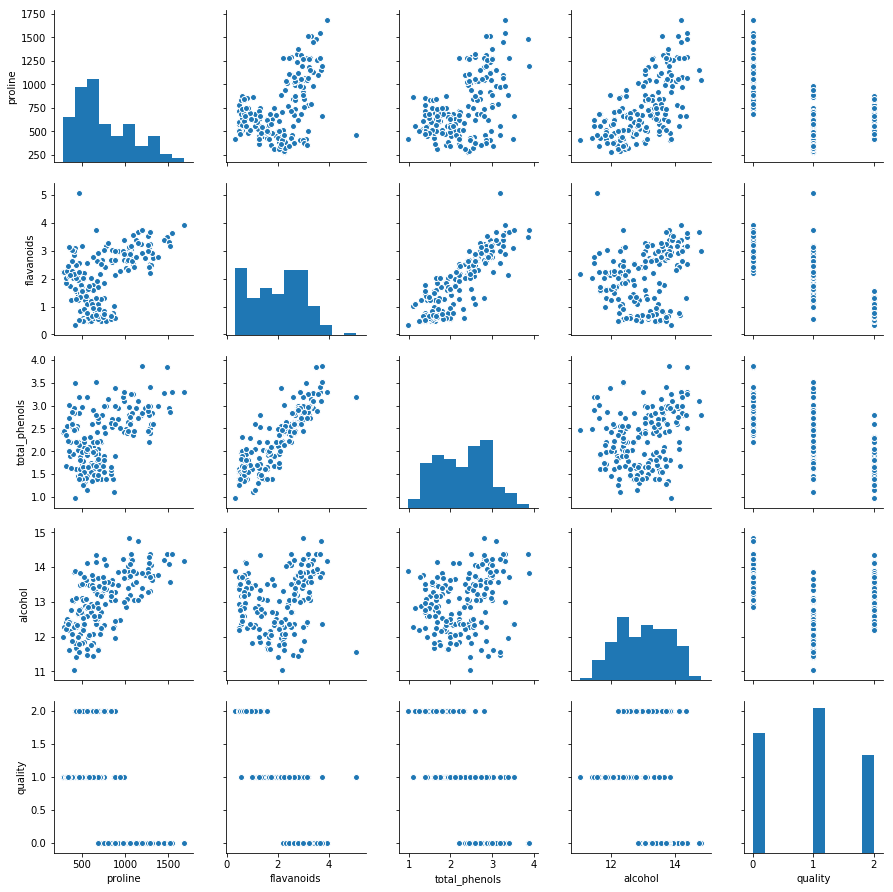

In [99]:
sns.pairplot(fav_wine)

In [100]:
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [101]:
X = df[[col for col in df.columns if col != 'MEDV']].copy()
y = df[['MEDV']].copy()

In [102]:
lasso = Lasso()
ls = lasso.fit(X, y)

In [103]:
pt = [1,3,5,6,7,9]

In [110]:
for col, v in enumerate(df.columns[:-1]):
    print(v, np.abs(lasso.coef_[col]))

CRIM 0.0634225454858
ZN 0.0491686686903
INDUS 0.0
CHAS 0.0
NOX 0.0
RM 0.94678566696
AGE 0.0209273679344
DIS 0.669008638555
RAD 0.264175006084
TAX 0.0152091514001
PTRATIO 0.723199013522
B 0.0082911659532
LSTAT 0.761432957426


In [116]:
selected_X = df[['RM', 'DIS', 'RAD', 'PTRATIO', 'LSTAT']].copy()

In [112]:
from sklearn.metrics import accuracy_score

In [117]:
lr = LinearRegression()
print('all features')
scores = cross_val_score(lr, X, y)
print(scores, '\n', 'Mean:', scores.mean())

print('features with Regularization')
las_scores = cross_val_score(lr, selected_X, y)
print(las_scores, '\n', 'mean:', las_scores.mean())

all features
[ 0.5828011   0.53193819 -5.85104986] 
 Mean: -1.57877018572
features with Regularization
[ 0.62566702  0.47128894 -0.20123162] 
 mean: 0.298574780062


In [178]:
wine_new.shape

(178, 17)

In [195]:
y = wine_new['quality_0'].copy()
X = wine_new[[col for col in wine_new if 'quality' not in col]].copy()

logreg = LogisticRegression(penalty='l1')
logreg.fit(X, y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l1', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [201]:
X.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0


In [216]:
# for col, v in enumerate(df.columns[:-1]):
#     print(v, np.abs(lasso.coef_[col]))
    
for i, col in enumerate(X):
    print(col, lg.coef_[:,i])

alcohol [-0.49052172]
malic_acid [ 0.67984544]
ash [ 1.29603227]
alcalinity_of_ash [-0.62999093]
magnesium [-0.0356262]
total_phenols [ 0.]
flavanoids [ 1.56699301]
nonflavanoid_phenols [ 0.]
proanthocyanins [ 0.]
color_intensity [-0.02161614]
hue [ 0.]
od280/od315_of_diluted_wines [ 0.35376654]
proline [ 0.01583798]


In [207]:
all_cols = [x for x in X if 'quality' not in x]
drop_columns = ['total_phenols', 'proanthocyanis', 'hue', 'nonflavanoid_phenols']

sel_X = X[[x for x in all_cols if col not in drop_columns]].copy()

In [208]:
y.shape

(178,)

In [209]:
print('all features')
wscores = cross_val_score(lg, X, y)
print(wscores, '\n', 'mean:', wscores.mean())

print('features with log regression')
wscores_lg = cross_val_score(lg, sel_X, y)
print(wscores_lg, '\n', 'mean:', wscores_lg.mean())

all features
[ 0.86666667  0.96666667  0.98275862] 
 mean: 0.938697318008
features with log regression
[ 0.85        0.96666667  0.98275862] 
 mean: 0.933141762452


In [213]:
presidents = ["Washington", "Adams", "Jefferson", "Madison", "Monroe", "Adams", "Jackson"]
for num, name in enumerate(presidents, start=1):
    print("President {}: {}".format(num, name))

President 1: Washington
President 2: Adams
President 3: Jefferson
President 4: Madison
President 5: Monroe
President 6: Adams
President 7: Jackson


In [217]:
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [221]:
X = df[[x for x in df.columns if x != 'MEDV']]
y = df[['MEDV']]

In [222]:
lasso = Lasso()
lasso.fit(X,y)

Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False)

In [229]:
for i, col in enumerate(df.columns[:-1]):
    print(col, lasso.coef_[i])

CRIM -0.0634225454858
ZN 0.0491686686903
INDUS -0.0
CHAS 0.0
NOX -0.0
RM 0.94678566696
AGE 0.0209273679344
DIS -0.669008638555
RAD 0.264175006084
TAX -0.0152091514001
PTRATIO -0.723199013522
B 0.0082911659532
LSTAT -0.761432957426


In [233]:
Xbos = df[['LSTAT', 'PTRATIO', 'RAD', 'DIS', 'RM']].copy()
ln = LinearRegression()

wine_score = cross_val_score(ln, X, y)
print('wine scores:', wine_score, '\n', 'wine scores mean:', wine_score.mean())

wine_score_reg = cross_val_score(ln, Xbos, y)
print('wine scores', wine_score_reg, '\n', 'wine scores mean:', wine_score_reg.mean())

wine scores: [ 0.5828011   0.53193819 -5.85104986] 
 wine scores mean: -1.57877018572
wine scores [ 0.62566702  0.47128894 -0.20123162] 
 wine scores mean: 0.298574780062


In [234]:
wine.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,quality
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0


In [239]:
lg = LogisticRegression(penalty='l1')
y = wine_new['quality_0'].copy()
X = wine_new[[x for x in wine_new if 'quality' not in x]].copy()

In [240]:
lg.fit(X, y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l1', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [247]:
for i, col in enumerate(X):
    print(col, ':', lg.coef_[0, i])

alcohol :   -0.489559022704
malic_acid :   0.680130471945
ash :   1.30281232531
alcalinity_of_ash :   -0.63105031321
magnesium :   -0.0356773261676
total_phenols :   0.0
flavanoids :   1.56671394441
nonflavanoid_phenols :   0.0
proanthocyanins :   0.0
color_intensity :   -0.0221610022958
hue :   0.0
od280/od315_of_diluted_wines :   0.352342795329
proline :   0.0158429072531


In [250]:
drop_cols = X[['total_phenols', 'nonflavanoid_phenols', 'proanthocyanins', 'hue']]
new_X = X[[x for x in X if x not in drop_cols]]

print('all features')
wine_s = cross_val_score(lg, X, y)
print(wine_s, '\n', 'mean:', wine_s.mean())

print('features with log')
wine_sr = cross_val_score(lg, new_X, y)
print(wine_sr, '\n', 'mean:', wine_sr.mean())

all features
[ 0.85        0.96666667  0.98275862] 
 mean: 0.933141762452
features with log
[ 0.86666667  0.96666667  0.98275862] 
 mean: 0.938697318008


In [251]:
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [260]:
X = df[[x for x in df if x != 'MEDV']]

In [264]:
X.head()
y = df['MEDV']

In [276]:
lr = LinearRegression()
rfe = RFE(lr, n_features_to_select=5, verbose=2)
rfe.fit(X,y)

Fitting estimator with 13 features.
Fitting estimator with 12 features.
Fitting estimator with 11 features.
Fitting estimator with 10 features.
Fitting estimator with 9 features.
Fitting estimator with 8 features.
Fitting estimator with 7 features.
Fitting estimator with 6 features.


RFE(estimator=LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False),
  n_features_to_select=5, step=1, verbose=2)

In [277]:
for i, col in enumerate([col for col in df if col != 'MEDV']):
    if rfe.support_[i] == True:
        print(col, 'selected for model')

CHAS selected for model
NOX selected for model
RM selected for model
DIS selected for model
PTRATIO selected for model


In [278]:
rfe_table = df.iloc[:, rfe.support_]

In [279]:
print('all features')
scores = cross_val_score(lr, X, y)
print(scores, '\n', 'mean:', scores.mean())

print('features with RFE')
scores_rfe = cross_val_score(lr, rfe_table, y)
print(scores_rfe, '\n', 'mean:', scores_rfe.mean())

all features
[ 0.5828011   0.53193819 -5.85104986] 
 mean: -1.57877018572
features with RFE
[ 0.67338097  0.44510749 -0.31159423] 
 mean: 0.268964741038


In [284]:
X = wine_new[[x for x in wine_new if 'quality' not in x]]
y = wine_new['quality_0']

In [294]:
lg = LogisticRegression()
rfe = RFE(lg, n_features_to_select=5, verbose=2)

rfe.fit(X,y)

for i, col in enumerate([col for col in X]):
    if rfe.support_[i] == True:
        print('feature selection:', col)

Fitting estimator with 13 features.
Fitting estimator with 12 features.
Fitting estimator with 11 features.
Fitting estimator with 10 features.
Fitting estimator with 9 features.
Fitting estimator with 8 features.
Fitting estimator with 7 features.
Fitting estimator with 6 features.
feature selection: ash
feature selection: alcalinity_of_ash
feature selection: flavanoids
feature selection: color_intensity
feature selection: od280/od315_of_diluted_wines


In [295]:
rfe_wine = wine_new.iloc[: ,rfe.support_]

In [296]:
print('all features')
w_score2 = cross_val_score(lg, X, y)
print(w_score2, '\n', 'mean:', w_score2.mean())

print('features with RFE')
w_scorerfe = cross_val_score(lg, rfe_wine, y)
print(w_scorerfe, '\n', 'mean:', w_scorerfe.mean())

all features
[ 0.86666667  0.96666667  0.96551724] 
 mean: 0.932950191571
features with RFE
[ 0.83333333  0.88333333  0.79310345] 
 mean: 0.836590038314


In [299]:
ss = StandardScaler()
stand_X = ss.fit_transform(X)

In [301]:
rfe_scaled = RFE(lg, n_features_to_select=5, verbose=2)
rfe_scaled.fit(stand_X, y)

for i, col in enumerate(X):
    if rfe_scaled.support_[i] == True:
        print('feature selection:', col)

Fitting estimator with 13 features.
Fitting estimator with 12 features.
Fitting estimator with 11 features.
Fitting estimator with 10 features.
Fitting estimator with 9 features.
Fitting estimator with 8 features.
Fitting estimator with 7 features.
Fitting estimator with 6 features.
feature selection: alcohol
feature selection: ash
feature selection: alcalinity_of_ash
feature selection: od280/od315_of_diluted_wines
feature selection: proline


In [303]:
rfe_wine2 = wine_new.iloc[:, rfe_scaled.support_]

In [304]:
print('all features')
w_score3 = cross_val_score(lg, stand_X, y)
print(w_score3, '\n', 'mean:', w_score2.mean())

print('features with RFE')
w_scorerfe = cross_val_score(lg, rfe_wine2, y)
print(w_scorerfe, '\n', 'mean:', w_scorerfe.mean())

all features
[ 0.88333333  1.          0.87931034] 
 mean: 0.932950191571
features with RFE
[ 0.91666667  0.93333333  0.98275862] 
 mean: 0.944252873563


In [305]:
wine_new.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,quality,quality_0,quality_1,quality_2
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0,1,0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0,1,0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0,1,0,0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0,1,0,0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0,1,0,0


In [308]:
y = wine_new['quality_0'].copy()
selectkbest = SelectKBest(score_func=f_classif, k=5)
selectkbest.fit(X,y)

SelectKBest(k=5, score_func=<function f_classif at 0x0000017428FEE7B8>)

In [324]:
for i, col in enumerate(X):
    print(col, '\nF-test:', '{0:0.5}'.format(selectkbest.scores_[i]), 
          'p-valule:', '{0:.2}'.format(selectkbest.pvalues_[i]),'\n')

alcohol 
F-test: 126.88 p-valule: 1.7e-22 

malic_acid 
F-test: 7.7876 p-valule: 0.0058 

ash 
F-test: 9.7645 p-valule: 0.0021 

alcalinity_of_ash 
F-test: 65.106 p-valule: 1.1e-13 

magnesium 
F-test: 20.953 p-valule: 8.9e-06 

total_phenols 
F-test: 107.04 p-valule: 6.7e-20 

flavanoids 
F-test: 146.32 p-valule: 6.6e-25 

nonflavanoid_phenols 
F-test: 35.083 p-valule: 1.6e-08 

proanthocyanins 
F-test: 29.795 p-valule: 1.6e-07 

color_intensity 
F-test: 3.6857 p-valule: 0.056 

hue 
F-test: 20.513 p-valule: 1.1e-05 

od280/od315_of_diluted_wines 
F-test: 73.642 p-valule: 4.8e-15 

proline 
F-test: 380.84 p-valule: 6.9e-46 



In [333]:
for i, col in enumerate(X):
    print(col,":", selectkbest.scores_[i], '\n', 'p-values:', 
          selectkbest.pvalues_[i])

alcohol : 126.878877349 
 p-values: 1.65055075123e-22
malic_acid : 7.78761588861 
 p-values: 0.00584102916881
ash : 9.76446496972 
 p-values: 0.00208134202016
alcalinity_of_ash : 65.1062847405 
 p-values: 1.06477729546e-13
magnesium : 20.9534136599 
 p-values: 8.86591263362e-06
total_phenols : 107.038250434 
 p-values: 6.73812301551e-20
flavanoids : 146.324393222 
 p-values: 6.64482044025e-25
nonflavanoid_phenols : 35.0826405706 
 p-values: 1.6220104141e-08
proanthocyanins : 29.7950280145 
 p-values: 1.6131346616e-07
color_intensity : 3.68574050694 
 p-values: 0.0564968576136
hue : 20.5132005414 
 p-values: 1.08893932938e-05
od280/od315_of_diluted_wines : 73.6422574022 
 p-values: 4.77677513434e-15
proline : 380.838227676 
 p-values: 6.93265672076e-46


In [320]:
sk_X = X.iloc[:, selectkbest.get_support()]
sk_X.head()

,alcohol,total_phenols,flavanoids,od280/od315_of_diluted_wines,proline
0,14.23,2.80,3.06,3.92,1065.0
1,13.20,2.65,2.76,3.40,1050.0
2,13.16,2.80,3.24,3.17,1185.0
3,14.37,3.85,3.49,3.45,1480.0
4,13.24,2.80,2.69,2.93,735.0


In [321]:
selected_Xs = selectkbest.transform(X)
print(X.shape, selected_Xs.shape)

(178, 13) (178, 5)


In [322]:
lg = LogisticRegression()

print('all features')
scores = cross_val_score(lg, X, y)
print(scores, '\n', 'mean:', scores.mean())

print('all features with SK-best')
scores_sk = cross_val_score(lg, selected_Xs, y)
print(scores_sk, '\n', 'mean:', scores_sk.mean())

all features
[ 0.86666667  0.96666667  0.96551724] 
 mean: 0.932950191571
all features with SK-best
[ 0.9         0.9         0.96551724] 
 mean: 0.92183908046


In [336]:
X = df[[x for x in df if x != 'MEDV']]
y = df['MEDV']

In [337]:
selectk = SelectKBest(score_func=f_regression, k=5)
selectk.fit(X,y)

SelectKBest(k=5, score_func=<function f_regression at 0x0000017428FEE950>)

In [338]:
sk_df = X.iloc[:, selectk.get_support()]

In [339]:
sk_df.head()

,INDUS,RM,TAX,PTRATIO,LSTAT
0,2.31,6.575,296.0,15.3,4.98
1,7.07,6.421,242.0,17.8,9.14
2,7.07,7.185,242.0,17.8,4.03
3,2.18,6.998,222.0,18.7,2.94
4,2.18,7.147,222.0,18.7,5.33


In [340]:
sel_Xs = selectk.transform(X)

In [343]:
lr = LinearRegression()

print('all features')
scores_bos = cross_val_score(lr, X, y)
print(scores_bos, '\n', 'mean:', scores_bos.mean())

print('all features with selectk')
scores_bos_sk = cross_val_score(lr, sel_Xs, y)
print(scores_bos_sk, '\n', 'mean:', scores_bos_sk.mean())

all features
[ 0.5828011   0.53193819 -5.85104986] 
 mean: -1.57877018572
all features with selectk
[ 0.68715645  0.39888847 -0.30016193] 
 mean: 0.261960997203


In [345]:
X = wine_new[[x for x in wine_new if x != 'quality']]
y = wine_new['quality_0']

ss = StandardScaler()
ss.fit(X)
standard_X = ss.transform(X)

In [349]:
knn_dict = {'n_neighbors': [3,5,7,9], 'p': [1,2], 'weights': ['uniform', 'distance']}

In [350]:
knn = KNeighborsClassifier()
grid_search = GridSearchCV(knn, knn_dict, verbose=2, n_jobs=-1)

In [351]:
grid_search.fit(standard_X, y)

Fitting 3 folds for each of 16 candidates, totalling 48 fits


[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:   36.4s
[Parallel(n_jobs=-1)]: Done  48 out of  48 | elapsed:   36.4s finished


GridSearchCV(cv=None, error_score='raise',
       estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform'),
       fit_params=None, iid=True, n_jobs=-1,
       param_grid={'n_neighbors': [3, 5, 7, 9], 'p': [1, 2], 'weights': ['uniform', 'distance']},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=None, verbose=2)

In [352]:
grid_search.best_score_

1.0

In [353]:
grid_search.best_params_

{'n_neighbors': 3, 'p': 1, 'weights': 'uniform'}

In [359]:
grid_search.best_estimator_.predict(standard_X)

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=uint8)

In [360]:
best_est = grid_search.best_estimator_

In [361]:
best_est

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=3, p=1,
           weights='uniform')

In [362]:
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [384]:
X = df[[x for x in df.columns if x != 'MEDV']]
y = df['MEDV']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33)

en = ElasticNet()
param_grid = {'fit_intercept': [True, False], 
              'alpha': np.linspace(0.01, 100,10), 'l1_ratio': np.linspace(0.01,100,10)}
gs = GridSearchCV(en, param_grid, verbose=2, n_jobs=-1)

In [385]:
gs.fit(X_train, y_train)

Fitting 3 folds for each of 200 candidates, totalling 600 fits


[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:   39.4s
[Parallel(n_jobs=-1)]: Done 600 out of 600 | elapsed:   39.9s finished
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:672: RuntimeWarning: invalid value encountered in subtract
  array_means[:, np.newaxis]) ** 2,


GridSearchCV(cv=None, error_score='raise',
       estimator=ElasticNet(alpha=1.0, copy_X=True, fit_intercept=True, l1_ratio=0.5,
      max_iter=1000, normalize=False, positive=False, precompute=False,
      random_state=None, selection='cyclic', tol=0.0001, warm_start=False),
       fit_params=None, iid=True, n_jobs=-1,
       param_grid={'fit_intercept': [True, False], 'alpha': array([  1.00000e-02,   1.11200e+01,   2.22300e+01,   3.33400e+01,
         4.44500e+01,   5.55600e+01,   6.66700e+01,   7.77800e+01,
         8.88900e+01,   1.00000e+02]), 'l1_ratio': array([  1.00000e-02,   1.11200e+01,   2.22300e+01,   3.33400e+01,
         4.44500e+01,   5.55600e+01,   6.66700e+01,   7.77800e+01,
         8.88900e+01,   1.00000e+02])},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=None, verbose=2)

In [386]:
print('best score:', grid_search.best_score_)
print('best params:',grid_search.best_params_)

best score: 1.0
best params: {'n_neighbors': 3, 'p': 1, 'weights': 'uniform'}


In [387]:
best_est = gs.best_estimator_

print(best_est.score(X_test, y_test))

0.644734932091
